# Deep_Learning 2023_Spring_Assignment_AI1

## 0.1 ITNPAI1 - Deep Learning for Vision and NLP (2022/3)



### Assignment Summary
In this activity, you are required to apply the knowledge acquired in this module through the design
and development of a complete project for deep learning-based image pattern recognition in an
application to be defined by yourself. For this, you will need to perform the following mandatory
steps:
1. Problem definition
2. GitHub repository
3. Dataset
4. Dataloader
5. Proposed solution
6. Experimental tests and evaluations
7. Quiz and Report
8. Demonstration session


### 1. Problem definition
You must choose a computer vision task (classification, detection, semantic segmentation, captioning, geotagging, etc) to be modeled from images collected in the context of two different cities (A
and B). - If the work is being carried out in pairs, cities A and B must be the hometowns of
each student. In the case of individual work, city A must be your hometown and city B must be
Stirling (or Edinburgh, if needed). - The standard project recommendation is to focus on recognizing cars or trees, which are easier to identify and annotate. Other objects or phenomena can be
adopted, but are subject to prior approval by the module instructor (Jefersson A. dos Santos). It
is not allowed to assemble datasets containing people. Other sensitive patterns, such
as license plates, must be properly hidden. - Don’t panic! We are aware that acquiring
images in situ is an impediment for most students. The dataset can be assembled with images
collected remotely or from public repositories. Just be careful with rights and permissions for using
images found on the internet. Anyway, these factors must be taken into account for the problem definition. - Think of interesting problems, but that are easy to assemble an image dataset.
1
Although we encourage you to do interesting and engaging work, it shouldn’t be too complex or
time-consuming. Try to appropriately scale the time required for this step. Ask the instructors for
advice, if necessary

### 2. GitHub repository
Give your project a name, create a private GitHub repository with the name [Module Code] +
[Project Name] and give access to the module instructors. Create a cover page with a description
of your project. This empty notebook must be uploaded in the repository as well as the created
dataset. The checkpoint date to perform this task will be two weeks after the publication of this
notebook. This notebook should be updated and committed to the repository according to the
checkpoint dates. The repository’s update history will be used as a criterion for monitoring and
evaluating the work. Check the videos provided in the extra section on Canvas for more
details on how to create your GitHub repository.


### 3. Dataset creation
You must collect a minimum of 200 positive samples from the study objects for each city (A
and B). Note that, depending on the task being solved, it will also be necessary to:

       (i) collect more samples - negative ones, for instance;
       (ii) annotating each image, delineating objects or creating bounding boxes. Planning and executing this correctly is                 important to ensure effective training of deep learning-based models.
Your dataset can be assembled from one or more of the following ways:

    • M1 - Pictures taken by yourself on site (street view from cities A and B), with attention
      to anonymization issues (if it is the case). It is not allowed to assemble datasets containing
      people. Other sensitive patterns, such as license plates, must be properly hidden.
      
    • M2 - Aerial satellite/drone images obtained from GIS and remote sensing platforms or public
      repositories. Be careful with unusual file formats that may be challenging to manipulate using
      basic image processing libraries. We recommend keeping or converting the images to jpg or png.
    
    • M3 - Pictures taken from other public available datasets. Remember you are not allowed to use datasets containing 
      people or other sensitive patterns/objects.
    
    • M4 - Images crawled from the internet as a whole (social networks, webpages, etc), with special attention to use 
      and copyrights.
      
    • M5 - Textual and metadata you may need in your project, with special attention to use and copyrights (as always!).

Important: If you collect the images on your own or from aerial imagery repositories, it will be
necessary to keep the geographic coordinates. If you collect from specific websites, please retain
the source links. This information should be placed in a .csv file and made available along with the
final dataset.


### 4. Dataloader
Here you are required to implement all the code related to pre-processing, cleaning, de-noising and
preparing the input images and metadata according to the necessary data structures as input to
your pattern recognition module. We recommend using <a href='https://pytorch.org/tutorials/beginner/basics/data_tutorial.html'>PyTorch</a> or <a href='https://keras.io/getting_started/intro_to_keras_for_engineers/'>Tensorflow (with Keras)</a> as a
base, but you are free to use any library or platform as long as it is well justified in the final report.

#### Using Necessary Libraries

In [33]:
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from sklearn.metrics import f1_score
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import scikitplot as skplt
import tensorflow as tf
import seaborn as sns
import numpy as np
import keras
import cv2
import os
import warnings
warnings.filterwarnings('ignore')

#### Converting images to array
first resizing both classes images to 256 X 256 size and then converting images of train and validation data to array using "OpenCV", the array contain image array and it's class (car class to 0 value and tree class to 1 value )

In [34]:
labels = ['cars', 'trees']
img_size = 256
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [35]:
glasgow_train_data = get_data('Dataset/glasgow/train')
stirling_train_data = get_data('Dataset/stirling/train')

glasgow_testing_data = get_data('Dataset/glasgow/test')
stirling_testing_data = get_data('Dataset/stirling/test')
print("Images converted to array")

FileNotFoundError: ignored

#### Ploting some images of both classes

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image

# images dataset folders path
folder_path_1  = 'Dataset/stirling/train/cars'
folder_path_2 = 'Dataset/stirling/test/trees'

# list of images from folder1
image_files_1 = os.listdir(folder_path_1)

# list of images from folder2
image_files_2 = os.listdir(folder_path_2)

# creating figure to display the images
fig = plt.figure(figsize=(10, 10))

# loop through the first 3 images from each folder and displaying them in a 2x3 grid
for i in range(3):
    # open each image file from the folder1
    img1 = Image.open(os.path.join(folder_path_1, image_files_1[i]))
    
    # add a subplot for current image from folder1
    ax1 = fig.add_subplot(2, 3, i+1)
    
    # remove the axis ticks for image
    ax1.set_xticks([])
    ax1.set_yticks([])
    
    # displaying the image from the folder1 using matplotlib's imshow function
    plt.imshow(img1)
    
    # open the image file from the folder2
    img2 = Image.open(os.path.join(folder_path_2, image_files_2[i]))
    
    # add a subplot for the current image from folder2
    ax2 = fig.add_subplot(2, 3, i+4)
    
    # remove the axis ticks for the second image
    ax2.set_xticks([])
    ax2.set_yticks([])
    
    # display the image from the folder2 using matplotlib's imshow function
    plt.imshow(img2)

# show the figure
plt.show()

In [ ]:
# Car array 
print('******** Car array with class ********')
glasgow_train_data[0]

In [ ]:
# Car array 
print('******** Tree array with class ********')
glasgow_train_data[-1]

### 5. Proposed solution
This is where you should implement most of the code for your solution. Write the routines for
training and predicting the models and any necessary intermediate steps. Post-processing functions
must also be implemented here.

    • Use good programming practices, modularizing and adequately commenting on your code. Code quality will be
      considered in the final assessment. Again, we recommend using PyTorch, but you are free to use any library 
      or platform. You just need to justify that in the final report.
    
    • You can use pre-trained models as backbones or any code available on the web as a basis, but they must be 
      correctly credited and referenced both in this notebook and in the final report. Cite the source link 
      repository and explicitly cite the authors of it. If you changed existing code, make it clear what the 
      changes were. Make it clear where your own code starts and where it ends. Note that the originality 
      percentage of the code will be considered in the evaluation, so use external codes wisely and sparingly. 
      Missconduct alert: remember that there are many tools that compare existing source code and that it is 
      relatively easy to identify authorship. So, be careful and fair by always properly thanking the authors 
      if you use external code.

#### Normalizing and and preparing data for machine learning
preparing data for a machine learning model. It starts by initializing empty lists for the training and validation features (x_train and x_val) and labels (y_train and y_val). Then, it loops through the train and val datasets to append the features and labels to their respective lists.

After that, the code normalizes the data by converting the x_train and x_val lists to NumPy arrays and dividing them by 255. The shape of the x_train array is then printed before it is reshaped to have dimensions of (-1, img_size, img_size, 1). The same is done for the x_val array.

Finally, the y_train and y_val lists are converted to NumPy arrays. The shape of the x_train array is printed again after reshaping.

##### Glasgow data normalization

In [36]:
glasgow_x_train = []
glasgow_y_train = []
glasgow_x_test = []
glasgow_y_test = []

for feature, label in glasgow_train_data:
  glasgow_x_train.append(feature)
  glasgow_y_train.append(label)

for feature, label in glasgow_testing_data:
  glasgow_x_test.append(feature)
  glasgow_y_test.append(label)

# Normalize the data
glasgow_x_train = np.array(glasgow_x_train) / 255
glasgow_x_test = np.array(glasgow_x_test) / 255
glasgow_x_train.reshape(-1, img_size, img_size, 1)
glasgow_y_train = np.array(glasgow_y_train)
glasgow_x_test.reshape(-1, img_size, img_size, 1)
glasgow_y_test = np.array(glasgow_y_test)
print('Training data shape', glasgow_x_train.shape)
print('Validation data shape', glasgow_x_test.shape)


Training data shape (200, 256, 256, 3)
Validation data shape (200, 256, 256, 3)


##### Stirling data normalization

In [37]:
stirling_x_train = []
stirling_y_train = []
stirling_x_test = []
stirling_y_test = []

for feature, label in stirling_train_data:
  stirling_x_train.append(feature)
  stirling_y_train.append(label)

for feature, label in stirling_testing_data:
  stirling_x_test.append(feature)
  stirling_y_test.append(label)

# Normalize the data
stirling_x_train = np.array(stirling_x_train) / 255
stirling_x_test = np.array(stirling_x_test) / 255
stirling_x_train.reshape(-1, img_size, img_size, 1)
stirling_y_train = np.array(stirling_y_train)
stirling_x_test.reshape(-1, img_size, img_size, 1)
stirling_y_test = np.array(stirling_y_test)
print('Training data shape', stirling_x_train.shape)
print('Validation data shape', stirling_x_test.shape)

Training data shape (200, 256, 256, 3)
Validation data shape (200, 256, 256, 3)


### 6. Experimental tests and evaluations
Here you must implement your code for training, testing and evaluating your solution. For this,
the following code blocks (E1, E2, and E3) are mandatory:
    
    • E1 - Training the models. Implement code to call the dataloaders implemented for training your models. 
      Make routines to test different parameters of your models. Plot graphs that illustrate how parameters 
      impact model training. Compare. Train and select a model for each city (A and B) and justify. You should 
      use half (50%) of the samples from each dataset for training and leave the other half for testing (50%).

#### Working with glasgow model

##### Creating Model

In [38]:
glasgow_model = Sequential()
glasgow_model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(256,256,3)))
glasgow_model.add(MaxPool2D())

glasgow_model.add(Conv2D(32, 3, padding="same", activation="relu"))
glasgow_model.add(MaxPool2D())

glasgow_model.add(Conv2D(64, 3, padding="same", activation="relu"))
glasgow_model.add(MaxPool2D())
glasgow_model.add(Dropout(0.4))

glasgow_model.add(Flatten())
glasgow_model.add(Dense(128,activation="relu"))
glasgow_model.add(Dense(1, activation="sigmoid"))

glasgow_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 32, 32, 64)      

##### Compiling Model

In [39]:
opt = Adam(lr=0.000001)
glasgow_model.compile(optimizer = opt ,  loss = tf.keras.losses.BinaryCrossentropy( 
    from_logits=False,
    label_smoothing=0.0,
    axis=-1,
    name='binary_crossentropy'), metrics = ['accuracy'])

##### Training Model

In [40]:
history = glasgow_model.fit(glasgow_x_train, glasgow_y_train,epochs = 50)

Epoch 1/50
7/7 [==============================] - 23s 3s/step - loss: 0.6866 - accuracy: 0.5300
Epoch 2/50
7/7 [==============================] - 19s 2s/step - loss: 0.6821 - accuracy: 0.5750
Epoch 3/50
7/7 [==============================] - 16s 2s/step - loss: 0.6853 - accuracy: 0.4950
Epoch 4/50
7/7 [==============================] - 16s 2s/step - loss: 0.6766 - accuracy: 0.5250
Epoch 5/50
7/7 [==============================] - 16s 2s/step - loss: 0.6755 - accuracy: 0.5100
Epoch 6/50
7/7 [==============================] - 15s 2s/step - loss: 0.6744 - accuracy: 0.5000
Epoch 7/50
7/7 [==============================] - 15s 2s/step - loss: 0.6681 - accuracy: 0.5000
Epoch 8/50
7/7 [==============================] - 16s 2s/step - loss: 0.6631 - accuracy: 0.5100
Epoch 9/50
7/7 [==============================] - 16s 2s/step - loss: 0.6581 - accuracy: 0.5150
Epoch 10/50
7/7 [==============================] - 17s 2s/step - loss: 0.6596 - accuracy: 0.5100
Epoch 11/50
7/7 [======================

##### Visualizing training results

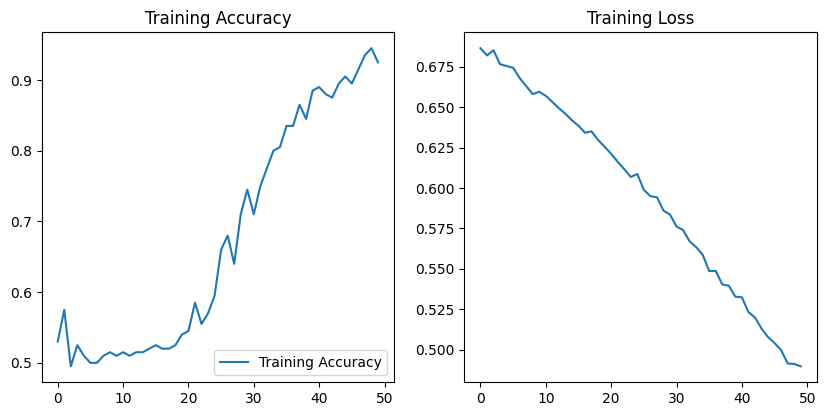

In [41]:
acc = history.history['accuracy']
loss = history.history['loss']

epochs_range = range(50)

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')
plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.title('Training Loss')
plt.show()


#### Working with stirling model

##### Creating model

In [42]:
stirling_model = Sequential()
stirling_model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(256,256,3)))
stirling_model.add(MaxPool2D())

stirling_model.add(Conv2D(32, 3, padding="same", activation="relu"))
stirling_model.add(MaxPool2D())

stirling_model.add(Conv2D(64, 3, padding="same", activation="relu"))
stirling_model.add(MaxPool2D())
stirling_model.add(Dropout(0.4))

stirling_model.add(Flatten())
stirling_model.add(Dense(128,activation="relu"))
stirling_model.add(Dense(1, activation="sigmoid"))

stirling_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 32, 32, 64)      

##### Compiling model

In [43]:
opt = Adam(lr=0.000001)
stirling_model.compile(optimizer = opt ,  loss = tf.keras.losses.BinaryCrossentropy( 
    from_logits=False,
    label_smoothing=0.0,
    axis=-1,
    name='binary_crossentropy'), metrics = ['accuracy'])

##### Training Model

In [44]:
history = stirling_model.fit(stirling_x_train, stirling_y_train,epochs = 50)

Epoch 1/50
7/7 [==============================] - 16s 2s/step - loss: 0.6982 - accuracy: 0.4800
Epoch 2/50
7/7 [==============================] - 15s 2s/step - loss: 0.6948 - accuracy: 0.4400
Epoch 3/50
7/7 [==============================] - 15s 2s/step - loss: 0.6937 - accuracy: 0.4950
Epoch 4/50
7/7 [==============================] - 15s 2s/step - loss: 0.6891 - accuracy: 0.5550
Epoch 5/50
7/7 [==============================] - 17s 2s/step - loss: 0.6852 - accuracy: 0.6000
Epoch 6/50
7/7 [==============================] - 15s 2s/step - loss: 0.6794 - accuracy: 0.6650
Epoch 7/50
7/7 [==============================] - 15s 2s/step - loss: 0.6775 - accuracy: 0.6450
Epoch 8/50
7/7 [==============================] - 15s 2s/step - loss: 0.6772 - accuracy: 0.6600
Epoch 9/50
7/7 [==============================] - 16s 2s/step - loss: 0.6754 - accuracy: 0.6700
Epoch 10/50
7/7 [==============================] - 16s 2s/step - loss: 0.6712 - accuracy: 0.6800
Epoch 11/50
7/7 [======================

##### Visualizing training results

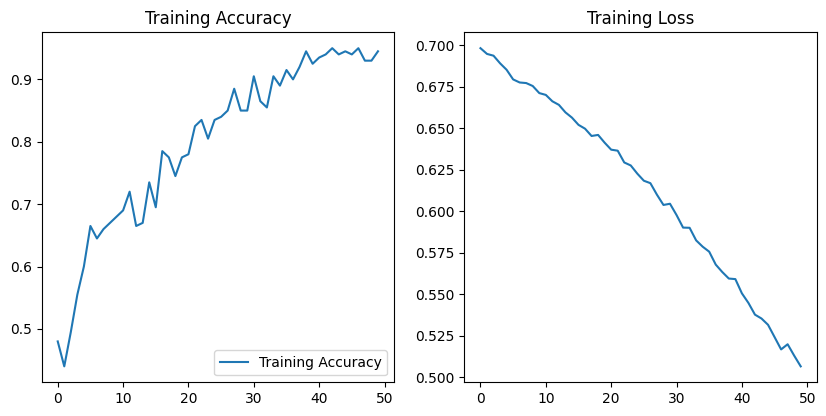

In [45]:
acc = history.history['accuracy']
loss = history.history['loss']

epochs_range = range(50)

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')
plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.title('Training Loss')
plt.show()


    • E2 - Testing the models in the dataset. You must implement code routines to test the predictive ability 
      of your models using half of each dataset intended for testing. The model trained in city A must be tested 
      in city A. The model trained in city B must be tested in city B. Use the evaluation 
      metrics (accuracy, F1-score, AUC, etc) that are most appropriate for your problem. Plot graphs that illustrate
      the results obtained for each city (A and B). Plot visual examples of correctly (true positive) and 
      incorrectly (false positive) classified samples.


#### Testing glasgow model

##### Using Confusion metrix, Accuracy and F1 score as asn evaluation metrics

In [46]:
glasgow_pred=glasgow_model.predict(glasgow_x_test)

7/7 [==============================] - 4s 531ms/step


In [47]:
threshold = 0.5
glasgow_y_pred = np.where(glasgow_pred >= threshold, 1, 0)
glasgow_ac = accuracy_score(glasgow_y_test, glasgow_y_pred)
glasgow_f1 = f1_score(glasgow_y_test, glasgow_y_pred)
print("Accuracy: ", glasgow_ac*100)
print("F1 Score: ", glasgow_f1*100)

Accuracy:  92.5
F1 Score:  92.82296650717704


<Axes: title={'center': 'Confusion Matrix for glasgow model'}, xlabel='Predicted label', ylabel='True label'>

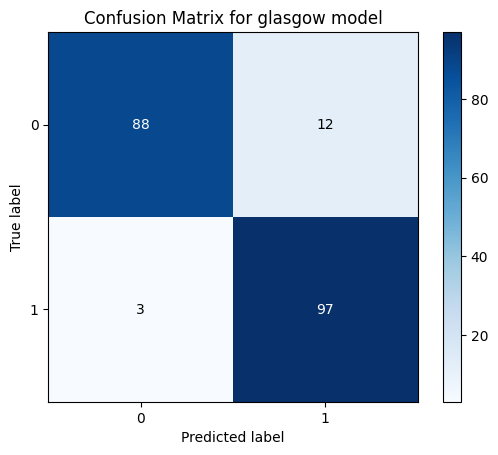

In [48]:
skplt.metrics.plot_confusion_matrix(glasgow_y_test, glasgow_y_pred, normalize=False, title = 'Confusion Matrix for glasgow model')

#### Testing stirling model

##### Using Confusion metrix, Accuracy and F1 score as asn evaluation metrics

In [49]:
stirling_pred=stirling_model.predict(stirling_x_test)

7/7 [==============================] - 4s 539ms/step


In [50]:
threshold = 0.5
stirling_y_pred = np.where(stirling_pred >= threshold, 1, 0)
stirling_ac = accuracy_score(stirling_y_test, stirling_y_pred)
stirling_f1 = f1_score(stirling_y_test, stirling_y_pred)
print("Accuracy: ", stirling_ac*100)
print("F1 Score: ", stirling_f1*100)

Accuracy:  90.5
F1 Score:  90.64039408866995


<Axes: title={'center': 'Confusion Matrix for Stirling model'}, xlabel='Predicted label', ylabel='True label'>

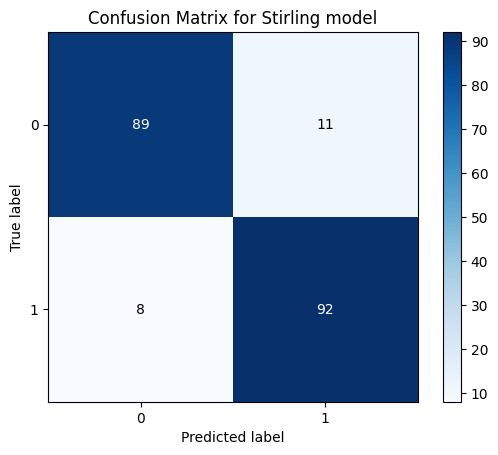

In [51]:
skplt.metrics.plot_confusion_matrix(stirling_y_test, stirling_y_pred, normalize=False, title = 'Confusion Matrix for Stirling model')

    • E3 - Testing the models crossing datasets. Here you must do exactly the same as in E2, but now training in 
      one city and testing in the other. The model trained in city A must be tested in city B. The model trained 
      in city B must be tested in city A. Use the same metrics and plot the same types of graphs so that results 
      are comparable.


#### Testing glasgow model with stirling data

In [52]:
glasgow_pred_stirling=glasgow_model.predict(stirling_x_test)

7/7 [==============================] - 5s 749ms/step


In [53]:
threshold = 0.5
glasgow_y_pred_stirling = np.where(glasgow_pred_stirling >= threshold, 1, 0)
glasgow_ac = accuracy_score(stirling_y_test, glasgow_y_pred_stirling)
glasgow_f1 = f1_score(stirling_y_test, glasgow_y_pred_stirling)
print("Accuracy: ", glasgow_ac*100)
print("F1 Score: ", glasgow_f1*100)

Accuracy:  91.0
F1 Score:  91.2621359223301


<Axes: title={'center': 'Confusion Matrix for glasgow model with stirling dataset'}, xlabel='Predicted label', ylabel='True label'>

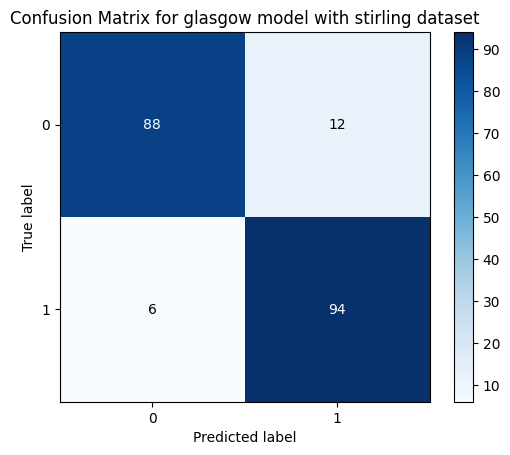

In [54]:
skplt.metrics.plot_confusion_matrix(stirling_y_test, glasgow_y_pred_stirling, normalize=False, title = 'Confusion Matrix for glasgow model with stirling dataset')

#### Testing stirling model with glasgow data

In [55]:
stirling_pred_glasgow = stirling_model.predict(glasgow_x_test)

7/7 [==============================] - 5s 621ms/step


In [56]:
threshold = 0.5
stirling_y_pred_glasgow = np.where(stirling_pred_glasgow  >= threshold, 1, 0)
stirling_ac = accuracy_score(glasgow_y_test, stirling_y_pred_glasgow)
stirling_f1 = f1_score(glasgow_y_test, stirling_y_pred_glasgow)
print("Accuracy: ", stirling_ac*100)
print("F1 Score: ", stirling_f1*100)


Accuracy:  93.0
F1 Score:  92.92929292929293


<Axes: title={'center': 'Confusion Matrix for stirling model with glasgow dataset'}, xlabel='Predicted label', ylabel='True label'>

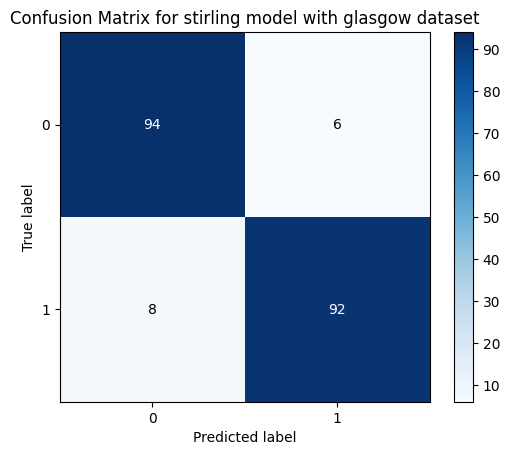

In [57]:
skplt.metrics.plot_confusion_matrix(glasgow_y_test, stirling_y_pred_glasgow, normalize=False, title = 'Confusion Matrix for stirling model with glasgow dataset')

### 7. Quiz and Report
Answer the assessment quiz that will be made available on Canvas one week before the final deadline.
Make a 2-page latex report using the <a href='https://www.overleaf.com/project/63ebb36e5745843af380351f'>IEEE template</a> with a maximum of 1000 words. Your report
should contain five sections: introduction, description of the proposed solution with justifications,
results (here you can include the same graphs and pictures generated in this jupyter notebook),
discussion of the results, and conclusion. Properly cite references to articles, tutorials, and sources
used. A pdf version of your report should be made available in the project’s github repository
under the name ”[project name] + _final_report.pdf”.


### 8. Demonstration
Some projects (around 10%) will be selected for a mandatory demonstration. During the demo, you
will be asked about implementation details and decisions that led to the design of the developed
solution.